In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn

In [3]:
# —————— Read data ——————
data = pd.read_csv('data/single_stock.csv', index_col=0)
display(data.head())
display(data.info())

,Date,Close
0,2017-01-04,2742.0
1,2017-01-05,2738.0
2,2017-01-06,2740.0
3,2017-01-10,2748.0
4,2017-01-11,2745.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1202 non-null   object 
 1   Close   1202 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.2+ KB


None

In [4]:
data.shape

(1202, 2)

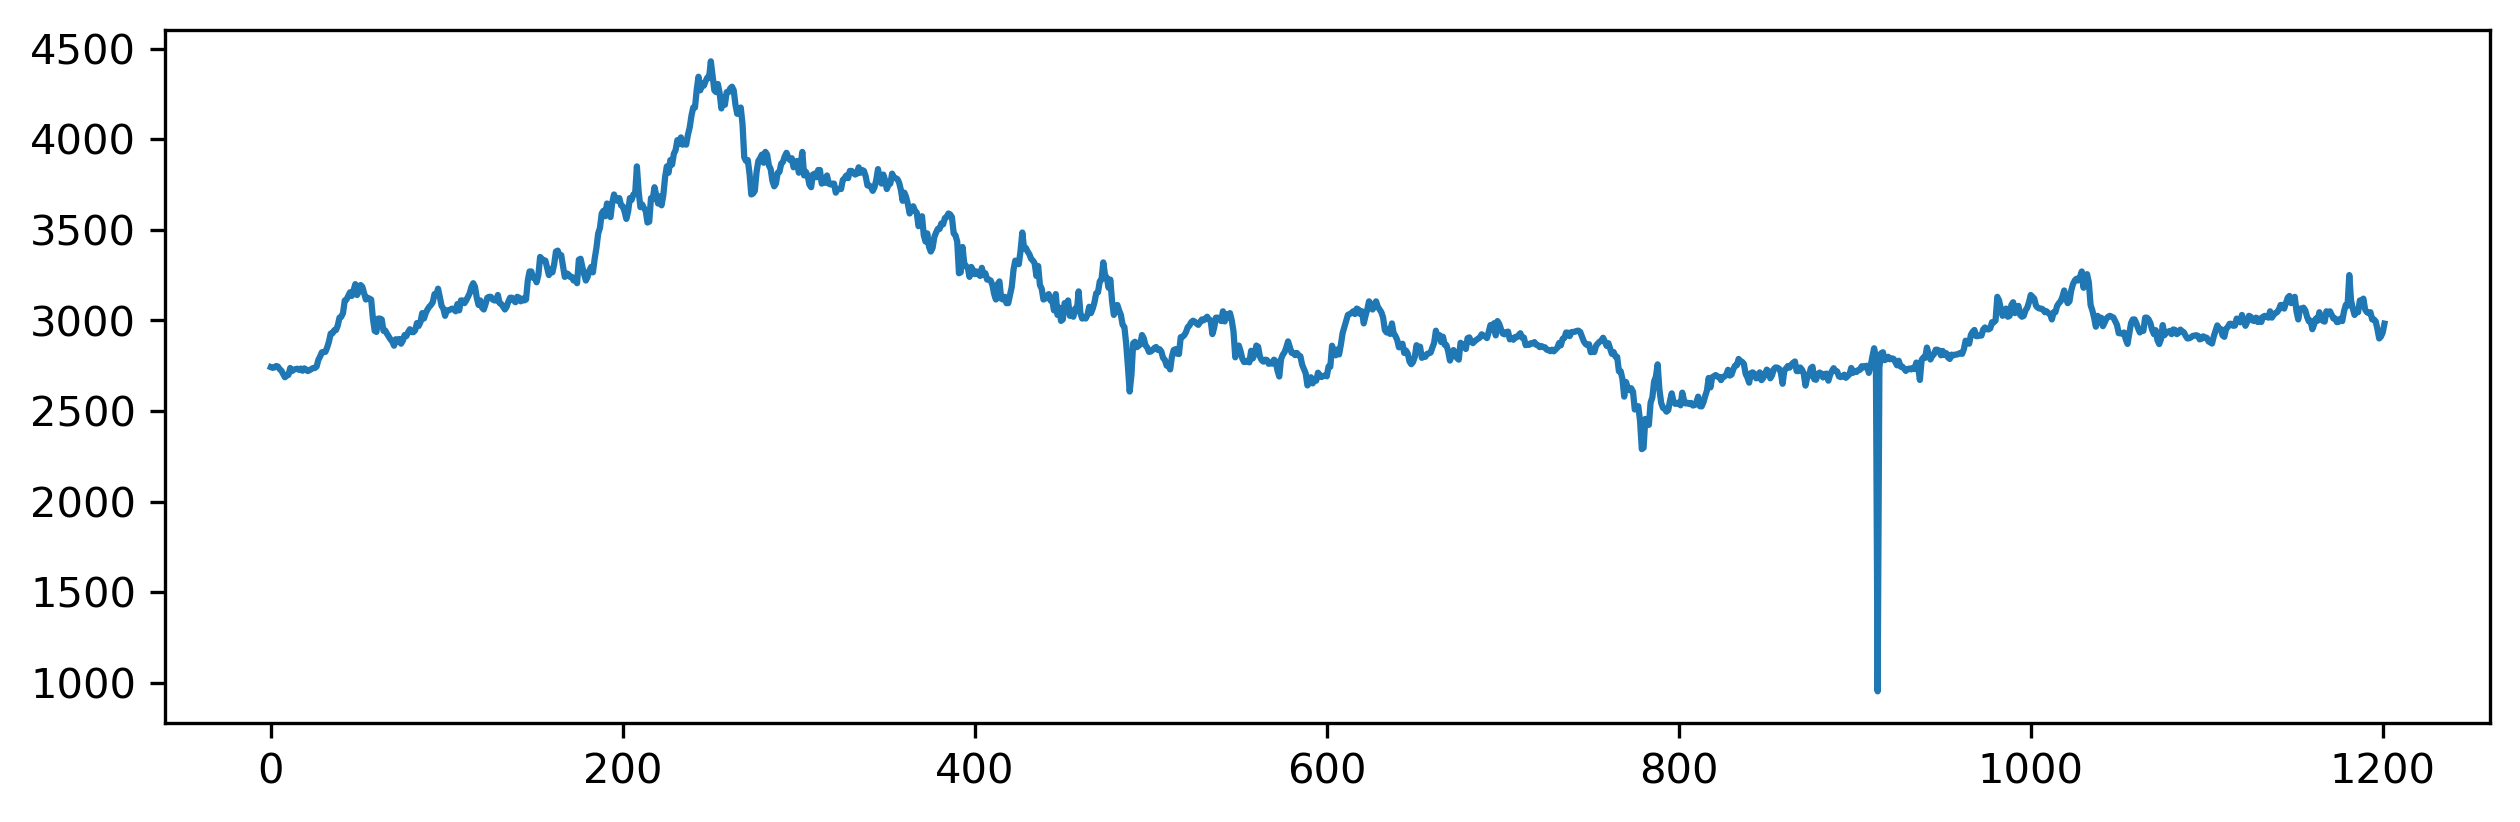

In [5]:
timeseries = data[["Close"]].values.astype('float32')

plt.figure(dpi=300, figsize=(10, 3))
plt.plot(timeseries)
plt.show()

In [6]:
# Can not change time order, train_test_split is not suitable
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]


In [8]:
train.shape

(805, 1)

In [9]:
test.shape

(397, 1)

In [10]:
# Convert data into Tensors
train_tensor = torch.FloatTensor(train).view(-1, train.shape[0], 1)
test_tensor = torch.FloatTensor(test).view(-1, test.shape[0], 1)

In [11]:
train_tensor.shape

torch.Size([1, 805, 1])

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps")

In [13]:
device

device(type='mps')

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self,
                 input_size=1,
                 hidden_size=50,
                 num_layers=1, 
                 output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers)
        
        self.fc = nn.Linear(hidden_size,
                            output_size)